In [27]:
%matplotlib inline
import yfinance as yf
import pandas as pd

def extract_tesla_stock():
    try:
        # Get Tesla stock data (ticker: TSLA)
        tesla = yf.Ticker("TSLA")
        tesla_data = tesla.history(period="max")
        # Reset the index so that the Date becomes a column
        tesla_data.reset_index(inplace=True)
        print("Question 1: First five rows of Tesla stock data:")
        display(tesla_data.head())
        return tesla_data
    except Exception as e:
        print("An error occurred while extracting Tesla stock data:", e)
        return None

# Execute Question 1
tesla_data = extract_tesla_stock()


Question 1: First five rows of Tesla stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [28]:
import requests
from bs4 import BeautifulSoup

def scrape_tesla_revenue():
    try:
        # URL of the webpage containing Tesla revenue data (example website)
        url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception(f"Failed to load page, status code: {response.status_code}")
        
        soup = BeautifulSoup(response.text, "html.parser")
        # Find all tables on the page
        tables = soup.find_all("table")
        if not tables:
            raise Exception("No tables found on the page.")
        
        # Assume the first table contains the revenue data
        revenue_table = tables[0]
        rows = revenue_table.find_all("tr")
        tesla_revenue = []
        # Skip the header row and parse each row for Date and Revenue
        for row in rows[1:]:
            cols = row.find_all("td")
            cols = [ele.text.strip() for ele in cols]
            if len(cols) >= 2:
                tesla_revenue.append({"Date": cols[0], "Revenue": cols[1]})
        
        tesla_revenue_df = pd.DataFrame(tesla_revenue)
        print("Question 2: Last five rows of Tesla revenue data:")
        display(tesla_revenue_df.tail())
        return tesla_revenue_df
    except Exception as e:
        print("An error occurred while scraping Tesla revenue data:", e)
        return None

# Execute Question 2
tesla_revenue_df = scrape_tesla_revenue()


An error occurred while scraping Tesla revenue data: Failed to load page, status code: 403


In [29]:
def extract_gme_stock():
    try:
        # Get GameStop stock data (ticker: GME)
        gme = yf.Ticker("GME")
        gme_data = gme.history(period="max")
        # Reset the index so that the Date becomes a column
        gme_data.reset_index(inplace=True)
        print("Question 3: First five rows of GME stock data:")
        display(gme_data.head())
        return gme_data
    except Exception as e:
        print("An error occurred while extracting GME stock data:", e)
        return None

# Execute Question 3
gme_data = extract_gme_stock()


Question 3: First five rows of GME stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [34]:
def scrape_gme_revenue():
    try:
        # URL of the webpage containing GME revenue data (example website)
        url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception(f"Failed to load page, status code: {response.status_code}")
        
        soup = BeautifulSoup(response.text, "html.parser")
        tables = soup.find_all("table")
        if not tables:
            raise Exception("No tables found on the page.")
        
        # Assume the first table contains the revenue data
        revenue_table = tables[0]
        rows = revenue_table.find_all("tr")
        gme_revenue = []
        for row in rows[1:]:
            cols = row.find_all("td")
            cols = [ele.text.strip() for ele in cols]
            if len(cols) >= 2:
                gme_revenue.append({"Date": cols[0], "Revenue": cols[1]})
        
        gme_revenue_df = pd.DataFrame(gme_revenue)
        print("Question 4: Last five rows of GME revenue data:")
        display(gme_revenue_df.tail())
        return gme_revenue_df
    except Exception as e:
        print("An error occurred while scraping GME revenue data:", e)
        return None

# Execute Question 4
gme_revenue_df = scrape_gme_revenue()


An error occurred while scraping GME revenue data: Failed to load page, status code: 403


Question 5: Displaying Tesla stock graph...


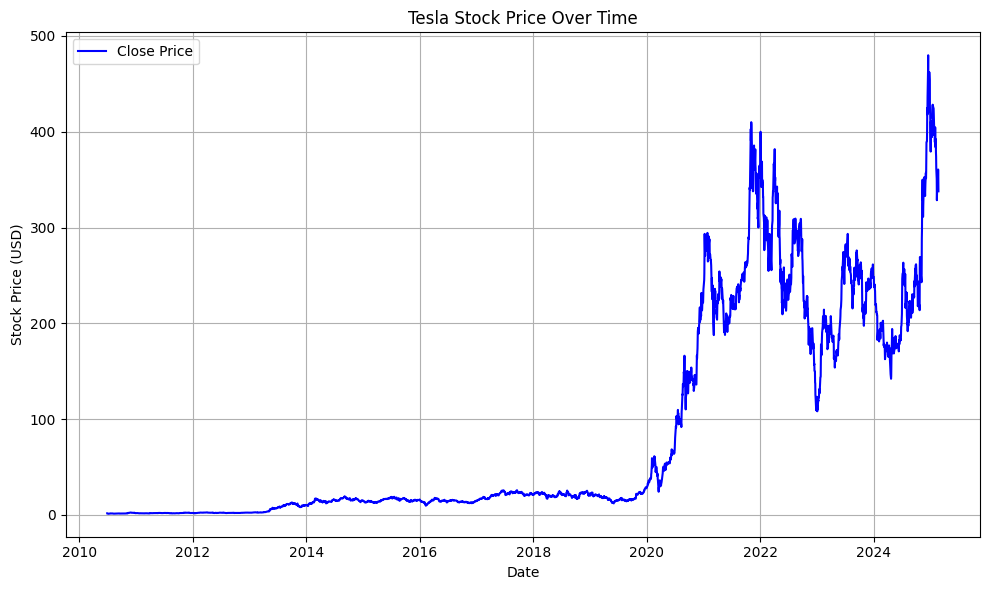

In [31]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    try:
        # Ensure the DataFrame contains the required columns
        if 'Date' not in df.columns or 'Close' not in df.columns:
            raise Exception("DataFrame must contain 'Date' and 'Close' columns for plotting.")
        
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
        plt.xlabel('Date')
        plt.ylabel('Stock Price (USD)')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("An error occurred while plotting the graph:", e)

def plot_tesla_stock():
    try:
        # Use previously extracted Tesla data if available; otherwise, fetch it again.
        if tesla_data is None:
            tesla = yf.Ticker("TSLA")
            data = tesla.history(period="max")
            data.reset_index(inplace=True)
        else:
            data = tesla_data
        print("Question 5: Displaying Tesla stock graph...")
        make_graph(data, "Tesla Stock Price Over Time")
    except Exception as e:
        print("An error occurred while plotting Tesla stock graph:", e)

# Execute Question 5
plot_tesla_stock()


Question 6: Displaying GME stock graph...


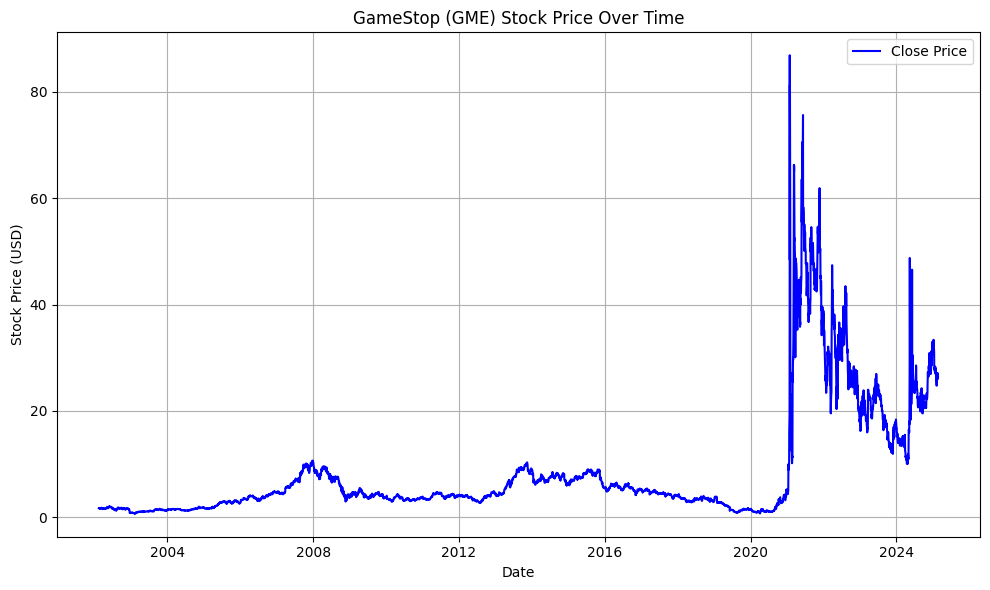

In [32]:
def plot_gme_stock():
    try:
        # Use previously extracted GME data if available; otherwise, fetch it again.
        if gme_data is None:
            gme = yf.Ticker("GME")
            data = gme.history(period="max")
            data.reset_index(inplace=True)
        else:
            data = gme_data
        print("Question 6: Displaying GME stock graph...")
        make_graph(data, "GameStop (GME) Stock Price Over Time")
    except Exception as e:
        print("An error occurred while plotting GME stock graph:", e)

# Execute Question 6
plot_gme_stock()


In [33]:
!pip install yfinance requests beautifulsoup4 pandas matplotlib